In [1]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [2]:
'''''Download text file from: http://www.gutenberg.org/ebooks/236'''''



#LOAD TEXT
#Save notepad as UTF-8 (select from dropdown during saving)

filename = "the_jungle_book.txt"
raw_text = open(filename, 'r').read()

In [3]:
raw_text

'The Project Gutenberg eBook of The Jungle Book\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: The Jungle Book\n\n\nAuthor: Rudyard Kipling\n\nRelease date: January 16, 2006 [eBook #236]\n                Most recently updated: May 1, 2023\n\nLanguage: English\n\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE JUNGLE BOOK ***\n\n\n\nTHE JUNGLE BOOK\n\nBy Rudyard Kipling\n\n\n\nContents\n\n     Mowgli’s Brothers\n     Hunting-Song of the Seeonee Pack\n     Kaa’s Hunting\n     Road-Song of the Bandar-Log\n     “Tiger! Tiger!”\n      Mowgli’s Song\n     The White Seal\n     Luk

In [4]:
raw_text=raw_text.lower()

In [5]:
raw_text

'the project gutenberg ebook of the jungle book\n    \nthis ebook is for the use of anyone anywhere in the united states and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. you may copy it, give it away or re-use it under the terms\nof the project gutenberg license included with this ebook or online\nat www.gutenberg.org. if you are not located in the united states,\nyou will have to check the laws of the country where you are located\nbefore using this ebook.\n\ntitle: the jungle book\n\n\nauthor: rudyard kipling\n\nrelease date: january 16, 2006 [ebook #236]\n                most recently updated: may 1, 2023\n\nlanguage: english\n\n\n\n*** start of the project gutenberg ebook the jungle book ***\n\n\n\nthe jungle book\n\nby rudyard kipling\n\n\n\ncontents\n\n     mowgli’s brothers\n     hunting-song of the seeonee pack\n     kaa’s hunting\n     road-song of the bandar-log\n     “tiger! tiger!”\n      mowgli’s song\n     the white seal\n     luk

In [6]:
print(raw_text[0:1000])

the project gutenberg ebook of the jungle book
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: the jungle book


author: rudyard kipling

release date: january 16, 2006 [ebook #236]
                most recently updated: may 1, 2023

language: english



*** start of the project gutenberg ebook the jungle book ***



the jungle book

by rudyard kipling



contents

     mowgli’s brothers
     hunting-song of the seeonee pack
     kaa’s hunting
     road-song of the bandar-log
     “tiger! tiger!”
      mowgli’s song
     the white seal
     lukannon
     “rikki-tikki-tavi”
      darzee

In [7]:
#CLEAN TEXT
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [8]:
raw_text

'the project gutenberg ebook of the jungle book\n    \nthis ebook is for the use of anyone anywhere in the united states and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. you may copy it, give it away or re-use it under the terms\nof the project gutenberg license included with this ebook or online\nat www.gutenberg.org. if you are not located in the united states,\nyou will have to check the laws of the country where you are located\nbefore using this ebook.\n\ntitle: the jungle book\n\n\nauthor: rudyard kipling\n\nrelease date: january ,  [ebook #]\n                most recently updated: may , \n\nlanguage: english\n\n\n\n*** start of the project gutenberg ebook the jungle book ***\n\n\n\nthe jungle book\n\nby rudyard kipling\n\n\n\ncontents\n\n     mowgli’s brothers\n     hunting-song of the seeonee pack\n     kaa’s hunting\n     road-song of the bandar-log\n     “tiger! tiger!”\n      mowgli’s song\n     the white seal\n     lukannon\n     “r

In [9]:
#How many total characters do we have in our training text?


In [10]:
chars = sorted(list(set(raw_text))) #List of every character


In [11]:
chars

['\n',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?',
 '[',
 ']',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'â',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '™']

In [12]:
#Character sequences must be encoded as integers. 
#Each unique character will be assigned an integer value. 
#Create a dictionary of characters mapped to integer values


char_to_int = dict((c, i) for i, c in enumerate(chars))

In [13]:
char_to_int

{'\n': 0,
 ' ': 1,
 '!': 2,
 '#': 3,
 '$': 4,
 '%': 5,
 '(': 6,
 ')': 7,
 '*': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '/': 12,
 ':': 13,
 ';': 14,
 '?': 15,
 '[': 16,
 ']': 17,
 '_': 18,
 '`': 19,
 'a': 20,
 'b': 21,
 'c': 22,
 'd': 23,
 'e': 24,
 'f': 25,
 'g': 26,
 'h': 27,
 'i': 28,
 'j': 29,
 'k': 30,
 'l': 31,
 'm': 32,
 'n': 33,
 'o': 34,
 'p': 35,
 'q': 36,
 'r': 37,
 's': 38,
 't': 39,
 'u': 40,
 'v': 41,
 'w': 42,
 'x': 43,
 'y': 44,
 'z': 45,
 'â': 46,
 '—': 47,
 '‘': 48,
 '’': 49,
 '“': 50,
 '”': 51,
 '•': 52,
 '™': 53}

In [14]:
#Do the reverse so we can print our predictions in characters and not integers

int_to_char = dict((i, c) for i, c in enumerate(chars))

In [15]:
int_to_char

{0: '\n',
 1: ' ',
 2: '!',
 3: '#',
 4: '$',
 5: '%',
 6: '(',
 7: ')',
 8: '*',
 9: ',',
 10: '-',
 11: '.',
 12: '/',
 13: ':',
 14: ';',
 15: '?',
 16: '[',
 17: ']',
 18: '_',
 19: '`',
 20: 'a',
 21: 'b',
 22: 'c',
 23: 'd',
 24: 'e',
 25: 'f',
 26: 'g',
 27: 'h',
 28: 'i',
 29: 'j',
 30: 'k',
 31: 'l',
 32: 'm',
 33: 'n',
 34: 'o',
 35: 'p',
 36: 'q',
 37: 'r',
 38: 's',
 39: 't',
 40: 'u',
 41: 'v',
 42: 'w',
 43: 'x',
 44: 'y',
 45: 'z',
 46: 'â',
 47: '—',
 48: '‘',
 49: '’',
 50: '“',
 51: '”',
 52: '•',
 53: '™'}

In [16]:
# summarize the data

n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)


Total Characters in the text; corpus length:  292116
Total Vocab:  54


In [17]:
#Now that we have characters we can create input/output sequences for training
# for LSTM input and output can be sequences... hence the term seq2seq


In [18]:
seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few

In [19]:
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X

In [20]:
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

Number of sequences: 29206


In [21]:
#Have a look at sentences and next_chars to see the continuity...
############################

#Just like time series, X is the sequence / sentence and y is the next value
#that comes after the sentence... 

# reshape input to be [samples, time steps, features]

#time steps = sequence length
#features = numbers of characters in our vocab (n_vocab)
#Vectorize all sentences: there are n_patterns sentences.
#For each sentence we have n_vocab characters available for seq_length
#Vectorization returns a vector for all sentences indicating the presence or absence 
#of a character. 


In [22]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_9112\2347007037.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9112\2347007037.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), n_vocab), dtype=np.bool)


In [23]:
print(x.shape)
print(y.shape)






(29206, 60, 54)
(29206, 54)


In [24]:
print(y[0:10])

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False  True False
  False False False False False False False False False False False False
  False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False  True False False False False False False False False
  False False False False False False]
 [False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False Fa

In [25]:
#Basic model with one LSTM
# build the model: a single LSTM


In [26]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               93696     
                                                                 
 dense (Dense)               (None, 54)                6966      
                                                                 
Total params: 100,662
Trainable params: 100,662
Non-trainable params: 0
_________________________________________________________________


C:\Users\DELL\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
######################################
# Deeper model woth 2 LSTM
#To stack LSTM layers, we need to change the configuration of the prior 
#LSTM layer to output a 3D array as input for the subsequent layer.
#We can do this by setting the return_sequences argument on the layer to True 
#(defaults to False). This will return one output for each input time step and provide a 3D array.
#Below is the same example as above with return_sequences=True.

#model = Sequential()
#model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#optimizer = RMSprop(lr=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)
#model.summary()


###############


In [28]:
# define the checkpoint
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=20,   
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/20
228/229 [============================>.] - ETA: 0s - loss: 2.5074
Epoch 1: loss improved from inf to 2.50705, saving model to saved_weights\saved_weights-01-2.5071.hdf5
229/229 [==============================] - 21s 83ms/step - loss: 2.5071
Epoch 2/20
229/229 [==============================] - ETA: 0s - loss: 2.0404
Epoch 2: loss improved from 2.50705 to 2.04041, saving model to saved_weights\saved_weights-02-2.0404.hdf5
229/229 [==============================] - 27s 117ms/step - loss: 2.0404
Epoch 3/20
228/229 [============================>.] - ETA: 0s - loss: 1.8383
Epoch 3: loss improved from 2.04041 to 1.83829, saving model to saved_weights\saved_weights-03-1.8383.hdf5
229/229 [==============================] - 38s 166ms/step - loss: 1.8383
Epoch 4/20
229/229 [==============================] - ETA: 0s - loss: 1.6897
Epoch 4: loss improved from 1.83829 to 1.68967, saving model to saved_weights\saved_weights-04-1.6897.hdf5
229/229 [==============================] - 28s 121

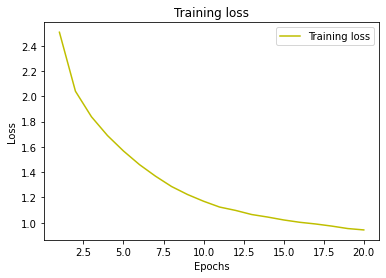

In [29]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
#Generate characters 
#We must provide a sequence of seq_lenth as input to start the generation process

#The prediction results is probabilities for each of the 48 characters at a specific
#point in sequence. Let us pick the one with max probability and print it out.
#Writing our own softmax function....

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)


In [31]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)


for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

----- Seed for our text prediction: "ing down, little toomai looked down upon scores and scores o"
f threet
gut geat learsed him is comple, whished, sat he had forgching tolk the big gand diak shoutideforie wight that that i talk and sat two
pattle
to little to himger.

“then made cheate, and he day no were thy bod him but it with him as kala naw ast on, he wham id any hah as so thee tram whan thou suctle.
then they touche, and hand, and they sone at the jungle-people in the unise the bud acces
